In [3]:
%%writefile top_pages.py
"""Find Vroots with more than 400 visits.

This program will take a CSV data file and output tab-seperated lines of

    Vroot -> number of visits

To run:

    python top_pages.py anonymous-msweb.data

To store output:

    python top_pages.py anonymous-msweb.data > top_pages.out
"""
from mrjob.job import MRJob
import csv

def csv_readline(line):
    """Given a sting CSV line, return a list of strings."""
    for row in csv.reader([line]):
        return row

class TopPages(MRJob):

    def mapper(self, line_no, line):
        """Extracts the Vroot that was visited"""
        cell = csv_readline(line)
        if cell[0] == 'V':
            yield cell[1],1
                  # What  Key, Value  do we want to output?

    def reducer(self, vroot, visit_counts):
        """Sumarizes the visit counts by adding them together.  If total visits
        is more than 400, yield the results"""
        total = sum(i for i in visit_counts)### FILL IN
                # How do we calculate the total visits from the visit_counts?
        if total > 400:
            yield vroot, total### FILL IN
                  # What  Key, Value  do we want to output?

if __name__ == '__main__':
    TopPages.run()

Overwriting top_pages.py


In [1]:
from top_pages import TopPages
import csv

mr_job = TopPages(args=['anonymous-msweb.data'])
with mr_job.make_runner() as runner:
    runner.run()
    for line in runner.stream_output():
        print mr_job.parse_output_line(line)

('1000', 912)
('1001', 4451)
('1002', 749)
('1003', 2968)
('1004', 8463)
('1007', 865)
('1008', 10836)
('1009', 4628)
('1010', 698)
('1014', 728)
('1017', 5108)
('1018', 5330)
('1020', 1087)
('1024', 521)
('1025', 2123)
('1026', 3220)
('1027', 507)
('1030', 1115)
('1031', 574)
('1032', 1446)
('1034', 9383)
('1035', 1791)
('1036', 759)
('1037', 1160)
('1038', 1110)
('1040', 1506)
('1041', 1500)
('1045', 474)
('1046', 636)
('1052', 842)
('1053', 670)
('1058', 672)
('1067', 548)
('1070', 602)
('1074', 584)
('1076', 444)
('1078', 462)
('1295', 716)


In [3]:
%load_ext autoreload
%autoreload 2

In [19]:
%%writefile mr_wc.py
# Copyright 2009-2010 Yelp
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

"""An implementation of wc as an MRJob.
This is meant as an example of why mapper_final is useful."""
from mrjob.job import MRJob


class MRWordCountUtility(MRJob):

    def __init__(self, *args, **kwargs):
        super(MRWordCountUtility, self).__init__(*args, **kwargs)
        self.chars = 0
        self.words = 0
        self.lines = 0

    def mapper(self, _, line):
        # Don't actually yield anything for each line. Instead, collect them
        # and yield the sums when all lines have been processed. The results
        # will be collected by the reducer.
        self.chars += len(line) + 1  # +1 for newline
        self.words += sum(1 for word in line.split() if word.strip())
        self.lines += 1

    def mapper_final(self):
        yield('chars', self.chars)
        yield('words', self.words)
        yield('lines', self.lines)

    def reducer(self, key, values):
        yield(key, sum(values))


if __name__ == '__main__':
    MRWordCountUtility.run()

Overwriting mr_wc.py


In [20]:
!python mr_wc.py mr_wc.py

no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
creating tmp directory /var/folders/zs/k144hqks281fbt0x68c_zj9m0000gp/T/mr_wc.JingXu.20160208.232452.560824

PLEASE NOTE: Starting in mrjob v0.5.0, protocols will be strict by default. It's recommended you run your job with --strict-protocols or set up mrjob.conf as described at https://pythonhosted.org/mrjob/whats-new.html#ready-for-strict-protocols

writing to /var/folders/zs/k144hqks281fbt0x68c_zj9m0000gp/T/mr_wc.JingXu.20160208.232452.560824/step-0-mapper_part-00000
Counters from step 1:
  (no counters found)
writing to /var/folders/zs/k144hqks281fbt0x68c_zj9m0000gp/T/mr_wc.JingXu.20160208.232452.560824/step-0-mapper-sorted
> sort /var/folders/zs/k144hqks281fbt0x68c_zj9m0000gp/T/mr_wc.JingXu.20160208.232452.560824/step-0-mapper_part-00000
writing to /var/folders/zs/k144hqks281fbt0x68c_zj9m0000gp/T/mr_wc.JingXu.20160208.232452.560824/step-0-reducer_part-00000
Counters from step 

In [21]:
!echo foo foo quux labs foo bar quux > WordCount.txt

In [21]:
%%writefile mr_wc.py
from mrjob.job import MRJob
from mrjob.step import MRJobStep
import re
 
WORD_RE = re.compile(r"[\w']+")
 
class MRWordFreqCount(MRJob):
    def mapper(self, _, line):
        for word in WORD_RE.findall(line):
            yield word.lower(), 1

    def combiner(self, word, counts):
        yield word, sum(counts)

    def reducer(self, word, counts):
        yield word, sum(counts)

if __name__ == '__main__':
    MRWordFreqCount.run()

Overwriting mr_wc.py


In [22]:
!python mr_wc.py WordCount.txt

no configs found; falling back on auto-configuration
no configs found; falling back on auto-configuration
creating tmp directory /var/folders/zs/k144hqks281fbt0x68c_zj9m0000gp/T/mr_wc.JingXu.20160208.232459.502647

PLEASE NOTE: Starting in mrjob v0.5.0, protocols will be strict by default. It's recommended you run your job with --strict-protocols or set up mrjob.conf as described at https://pythonhosted.org/mrjob/whats-new.html#ready-for-strict-protocols

writing to /var/folders/zs/k144hqks281fbt0x68c_zj9m0000gp/T/mr_wc.JingXu.20160208.232459.502647/step-0-mapper_part-00000
Counters from step 1:
  (no counters found)
writing to /var/folders/zs/k144hqks281fbt0x68c_zj9m0000gp/T/mr_wc.JingXu.20160208.232459.502647/step-0-mapper-sorted
> sort /var/folders/zs/k144hqks281fbt0x68c_zj9m0000gp/T/mr_wc.JingXu.20160208.232459.502647/step-0-mapper_part-00000
writing to /var/folders/zs/k144hqks281fbt0x68c_zj9m0000gp/T/mr_wc.JingXu.20160208.232459.502647/step-0-reducer_part-00000
Counters from step 

In [23]:
from mr_wc import MRWordFreqCount
mr_job = MRWordFreqCount(args=['WordCount.txt'])
with mr_job.make_runner() as runner: 
    runner.run()
    # stream_output: get access of the output 
    for line in runner.stream_output():
        print mr_job.parse_output_line(line)

('bar', 1)
('foo', 3)
('labs', 1)
('quux', 2)


In [17]:
%matplotlib inline
import numpy as np
import pylab 
size1 = size2 = size3 = 10000
samples1 = np.random.multivariate_normal([4, 0], [[1, 0],[0, 1]], size1)
data = samples1
samples2 = np.random.multivariate_normal([6, 6], [[1, 0],[0, 1]], size2)
data = np.append(data,samples2, axis=0)
samples3 = np.random.multivariate_normal([0, 4], [[1, 0],[0, 1]], size3)
data = np.append(data,samples3, axis=0)
# Randomlize data
data = data[np.random.permutation(size1+size2+size3),]
np.savetxt('Kmeandata.csv',data,delimiter = ",")

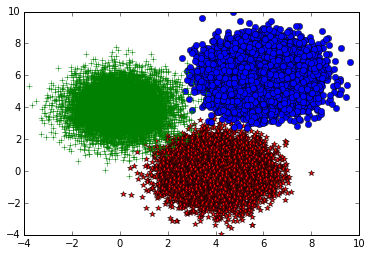

In [18]:
pylab.plot(samples1[:, 0], samples1[:, 1],'*', color = 'red')
pylab.plot(samples2[:, 0], samples2[:, 1],'o',color = 'blue')
pylab.plot(samples3[:, 0], samples3[:, 1],'+',color = 'green')
pylab.show()

In [1]:
%%writefile Kmeans.py
from numpy import argmin, array, random
from mrjob.job import MRJob
from mrjob.step import MRJobStep
from itertools import chain

#Calculate find the nearest centroid for data point 
def MinDist(datapoint, centroid_points):
    datapoint = array(datapoint)
    centroid_points = array(centroid_points)
    diff = datapoint - centroid_points 
    diffsq = diff*diff
    # Get the nearest centroid for each instance
    minidx = argmin(list(diffsq.sum(axis = 1)))
    return minidx

#Check whether centroids converge
def stop_criterion(centroid_points_old, centroid_points_new,T):
    oldvalue = list(chain(*centroid_points_old))
    newvalue = list(chain(*centroid_points_new))
    Diff = [abs(x-y) for x, y in zip(oldvalue, newvalue)]
    Flag = True
    for i in Diff:
        if(i>T):
            Flag = False
            break
    return Flag

class MRKmeans(MRJob):
    centroid_points=[]
    k=3    
    def steps(self):
        return [
            MRJobStep(mapper_init = self.mapper_init, mapper=self.mapper,combiner = self.combiner,reducer=self.reducer)
               ]
    #load centroids info from file
    def mapper_init(self):
        self.centroid_points = [map(float,s.split('\n')[0].split(',')) for s in open("/Users/JingXu/Dropbox/DataScience/W261/W261/HW4/Centroids.txt").readlines()]
        open('/Users/JingXu/Dropbox/DataScience/W261/W261/HW4/Centroids.txt', 'w').close()
    #load data and output the nearest centroid index and data point 
    def mapper(self, _, line):
        D = (map(float,line.split(',')))
        yield int(MinDist(D,self.centroid_points)), (D[0],D[1],1)
    #Combine sum of data points locally
    def combiner(self, idx, inputdata):
        sumx = sumy = num = 0
        for x,y,n in inputdata:
            num = num + n
            sumx = sumx + x
            sumy = sumy + y
        yield idx,(sumx,sumy,num)
    #Aggregate sum for each cluster and then calculate the new centroids
    def reducer(self, idx, inputdata): 
        centroids = []
        num = [0]*self.k 
        for i in range(self.k):
            centroids.append([0,0])
        for x, y, n in inputdata:
            num[idx] = num[idx] + n
            centroids[idx][0] = centroids[idx][0] + x
            centroids[idx][1] = centroids[idx][1] + y
        centroids[idx][0] = centroids[idx][0]/num[idx]
        centroids[idx][1] = centroids[idx][1]/num[idx]
        with open('/Users/JingXu/Dropbox/DataScience/W261/W261/HW4/Centroids.txt', 'a') as f:
            f.writelines(str(centroids[idx][0]) + ',' + str(centroids[idx][1]) + '\n')
        yield idx,(centroids[idx][0],centroids[idx][1])
      
if __name__ == '__main__':
    MRKmeans.run()

Overwriting Kmeans.py


In [2]:
from numpy import random
from Kmeans import MRKmeans, stop_criterion
mr_job = MRKmeans(args=['Kmeandata.csv'])

#Geneate initial centroids
centroid_points = []
k = 3
for i in range(k):
    centroid_points.append([random.uniform(-3,3),random.uniform(-3,3)])
with open('/Users/JingXu/Dropbox/DataScience/W261/W261/HW4/Centroids.txt', 'w+') as f:
        f.writelines(','.join(str(j) for j in i) + '\n' for i in centroid_points)

# Update centroids iteratively
i = 0
while(1):
    # save previous centoids to check convergency
    centroid_points_old = centroid_points[:]
    print "iteration"+str(i)+":"
    with mr_job.make_runner() as runner: 
        runner.run()
        # stream_output: get access of the output 
        for line in runner.stream_output():
            key,value =  mr_job.parse_output_line(line)
            print key, value
            centroid_points[key] = value
    print "\n"
    i = i + 1
    if(stop_criterion(centroid_points_old,centroid_points,0.01)):
        break
print "Centroids\n"
print centroid_points

iteration0:
0

 [4.017685659909219, -0.22873830567767328]
1 [-2.7245708154639523, 3.754014767611713]
2 [3.0842621335051623, 4.805342773154206]


iteration1:
0

 [3.993864652879576, -0.015591579269715557]
1 [-0.6636412597629431, 3.891914115216752]
2 [4.505373994890433, 5.439341501253388]


iteration2:
0

 [3.9979746866152173, -0.004708025376286799]
1 [-0.04661661420214042, 3.984301219466043]
2 [5.918261574051553, 5.95682876186654]


iteration3:
0

 [4.003033151711755, -0.0006672443388043793]
1 [0.005518858398406668, 3.9953450435598765]
2 [6.000067242068678, 5.9908877635305755]


iteration4:
0 [4.003328144109392, -0.00034670384102145817]
1 [0.005801148679127028, 3.995228430980042]
2 [6.000289109398927, 5.991481703829911]


Centroids

[[4.003328144109392, -0.00034670384102145817], [0.005801148679127028, 3.995228430980042], [6.000289109398927, 5.991481703829911]]
